# Big Data for Health (CSE6250) 

Goal: Using Support Vector Machine model to predict sepsis onset using MIMIC III Data

Author: Caleb Sabatini

## Model Imports

In [2]:
from Python.model_data import model_data
from Python.utils import classification_metrics, plot_roc, plot_prc

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from imblearn.over_sampling import RandomOverSampler

np.random.seed(0)

## Support Vector Machine - Without Oversampling

Train/Test data size: 4885/543


/home/csabatini/miniconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


______________________________________________
Classifier: SVM
Accuracy:  0.8840
AUC:  0.6804
AUPRC:  0.2623
Precision:  0.0000
Recall:  0.0000
F1-score:  0.0000
______________________________________________



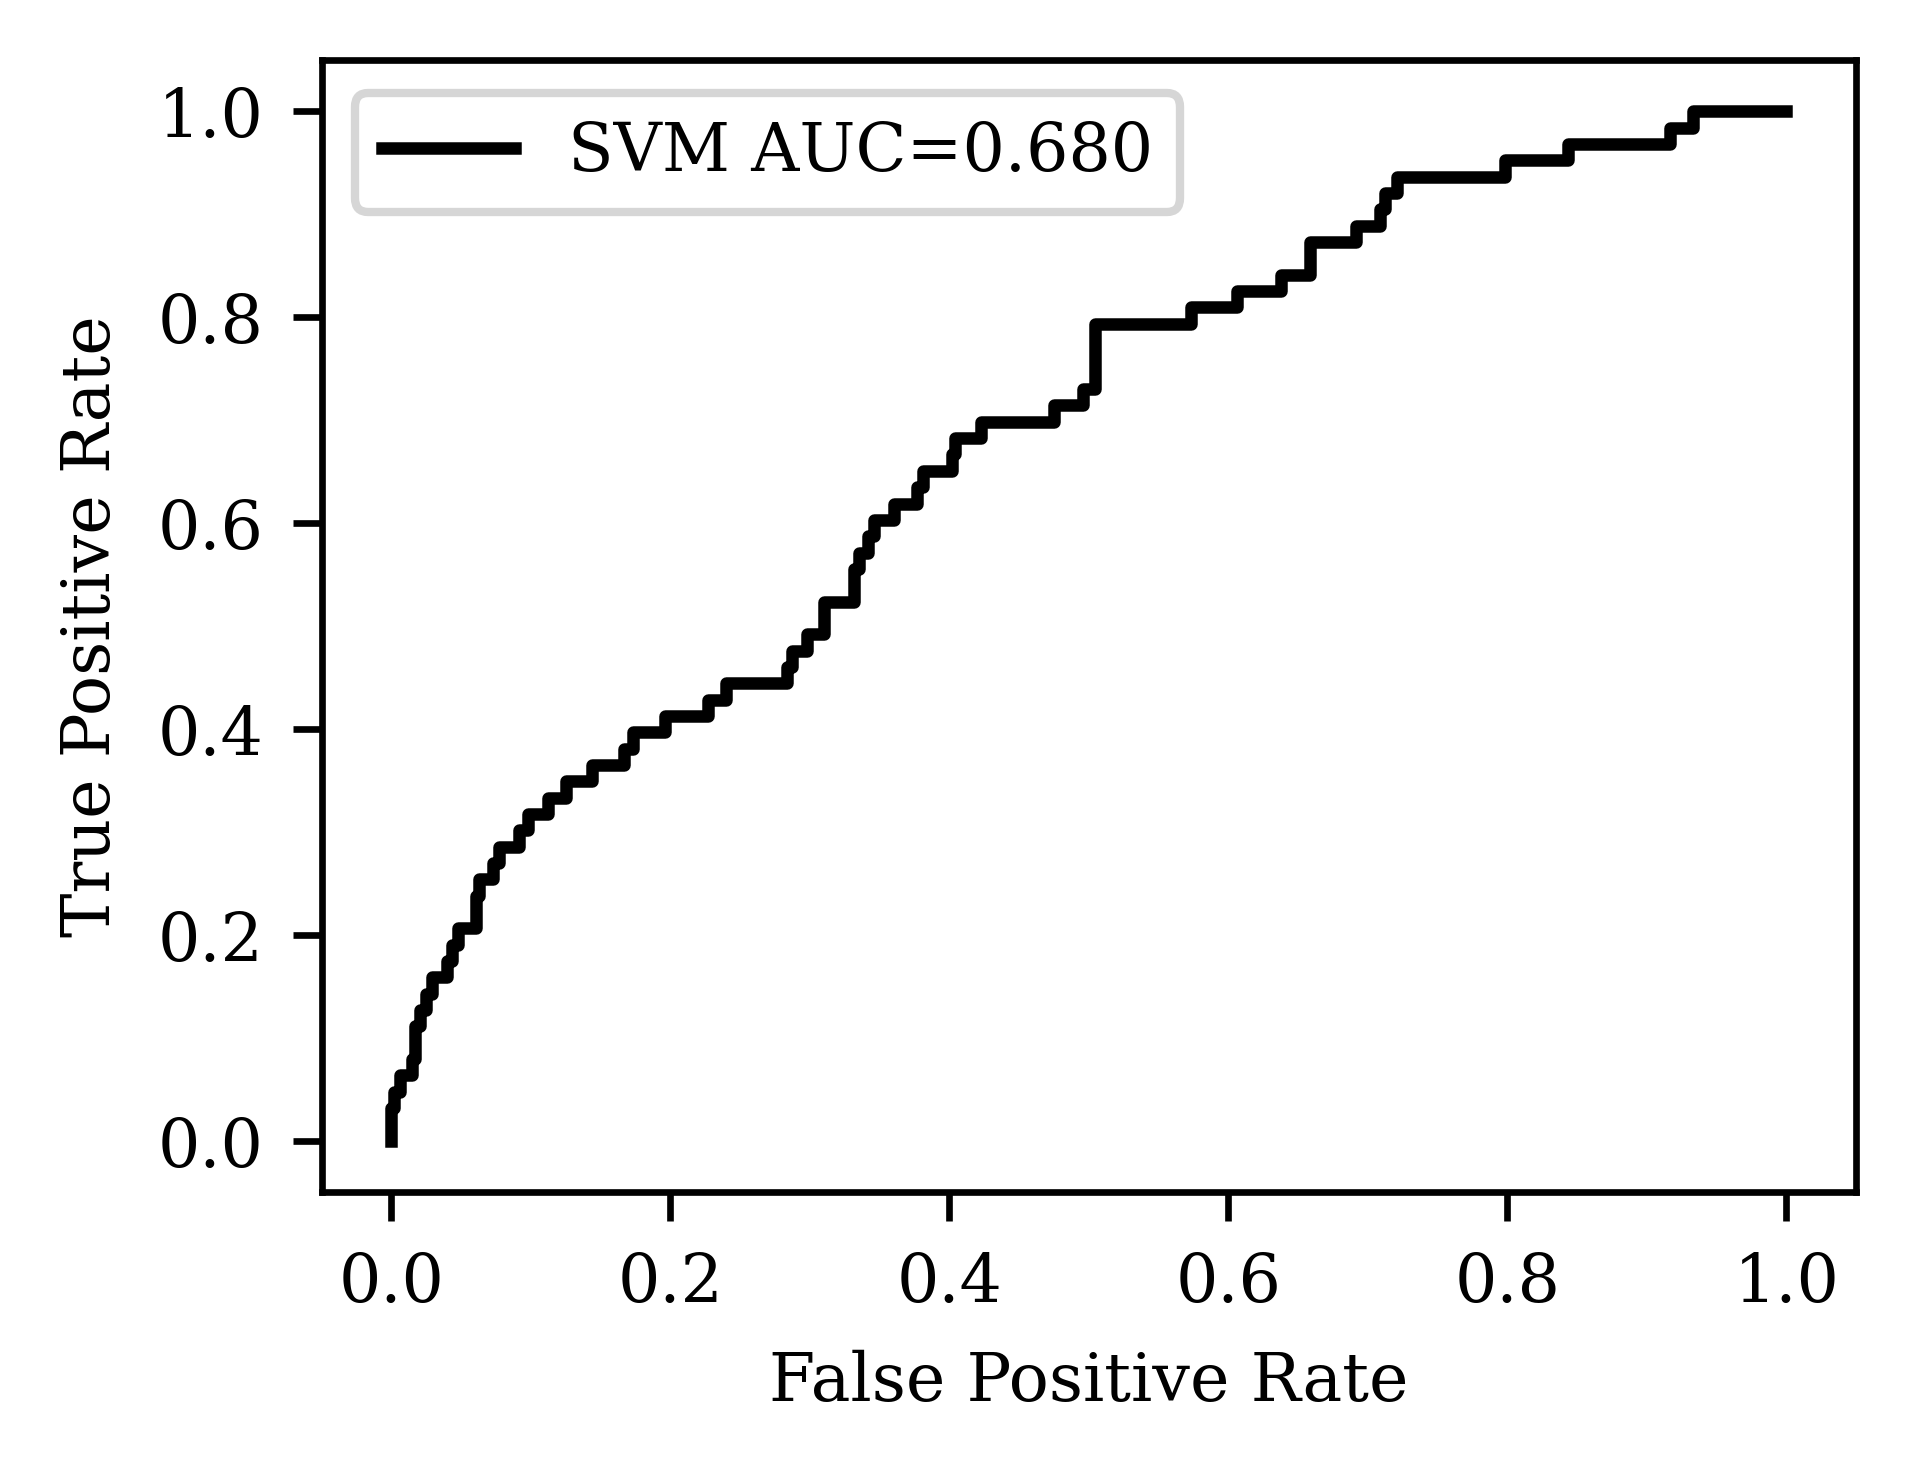

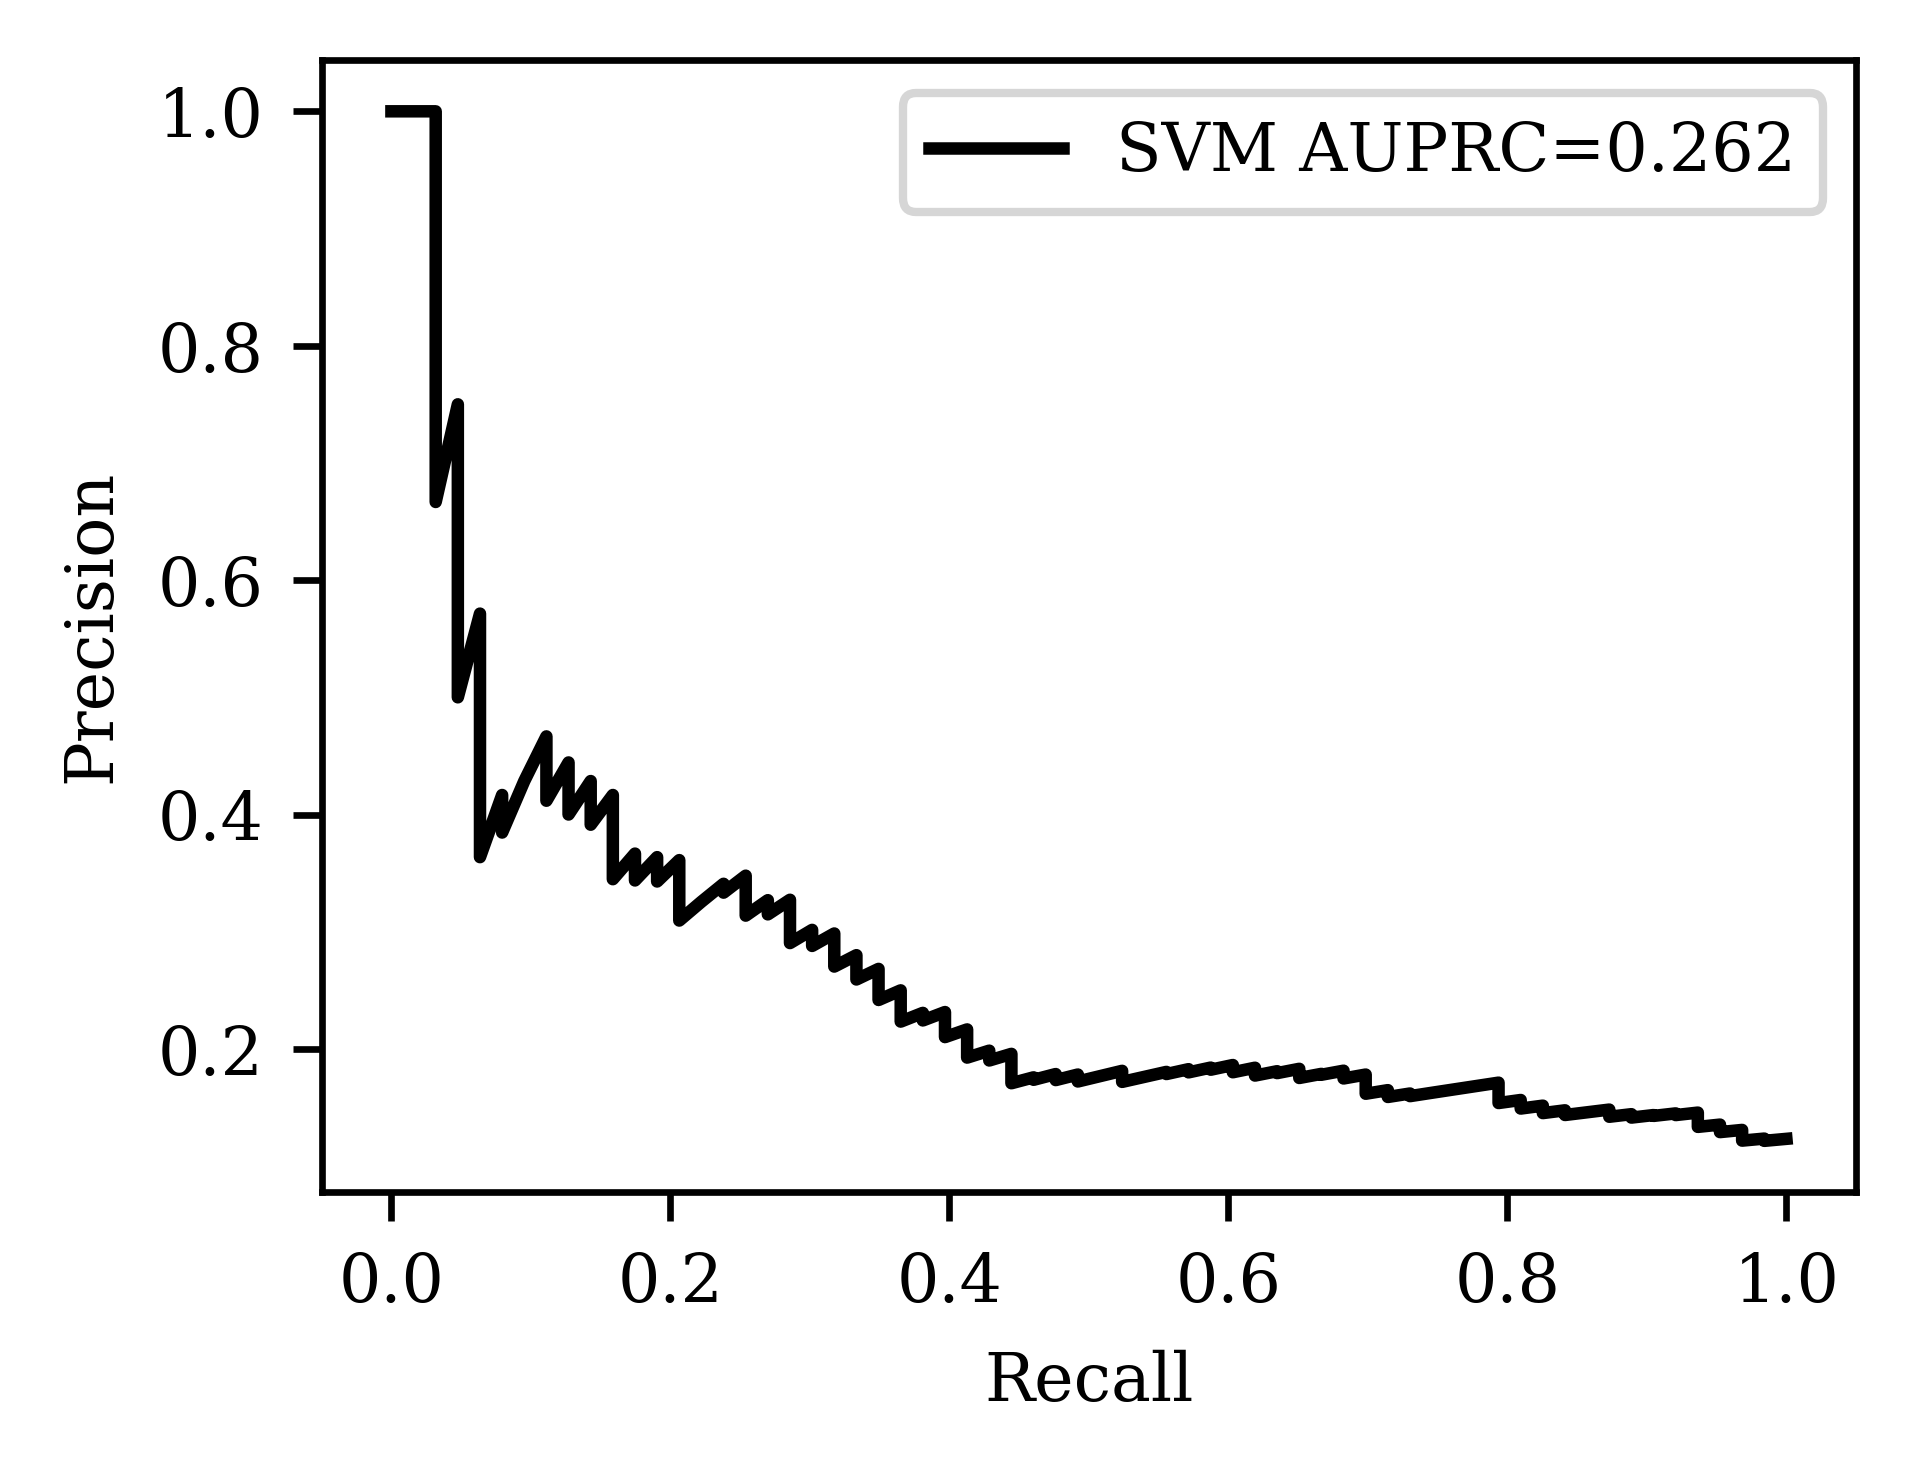

In [6]:
df_train, df_test = model_data(model_type="SVM", test_size=.1)

x_train, y_train = df_train.drop(columns=['label', 'icustay_id']), df_train['label']
x_test, y_test = df_test.drop(columns=['label', 'icustay_id']), df_test['label']

x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_test.median())

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = SVC(kernel='rbf', probability=True, random_state=0)
rand_list = {"C": stats.uniform(2, 10), "gamma": stats.uniform(0.1, 1)}
auc = make_scorer(roc_auc_score)
#rand_search = RandomizedSearchCV(model, param_distributions=rand_list, n_iter=10, n_jobs=5, cv=5, random_state=0, scoring=auc) 
#rand_search.fit(x_train, y_train) 
#best_params = rand_search.best_params_
best_params = {'C':6.17022004702574, 'gamma':0.8203244934421581}

model = SVC(kernel='rbf', probability=True, random_state=0, C=best_params['C'], gamma=best_params['gamma'])
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:,1]

classification_metrics("SVM", y_test, y_pred)
plot_roc(figname="output/SVM_roc.png", SVM="output/SVM_roc.csv")
plot_prc(figname="output/SVM_prc.png", SVM="output/SVM_prc.csv")

## Support Vector Machine - With Oversampling

______________________________________________
Classifier: SVM
Accuracy:  0.8877
AUC:  0.6839
AUPRC:  0.2988
Precision:  0.5714
Recall:  0.1270
F1-score:  0.2078
______________________________________________



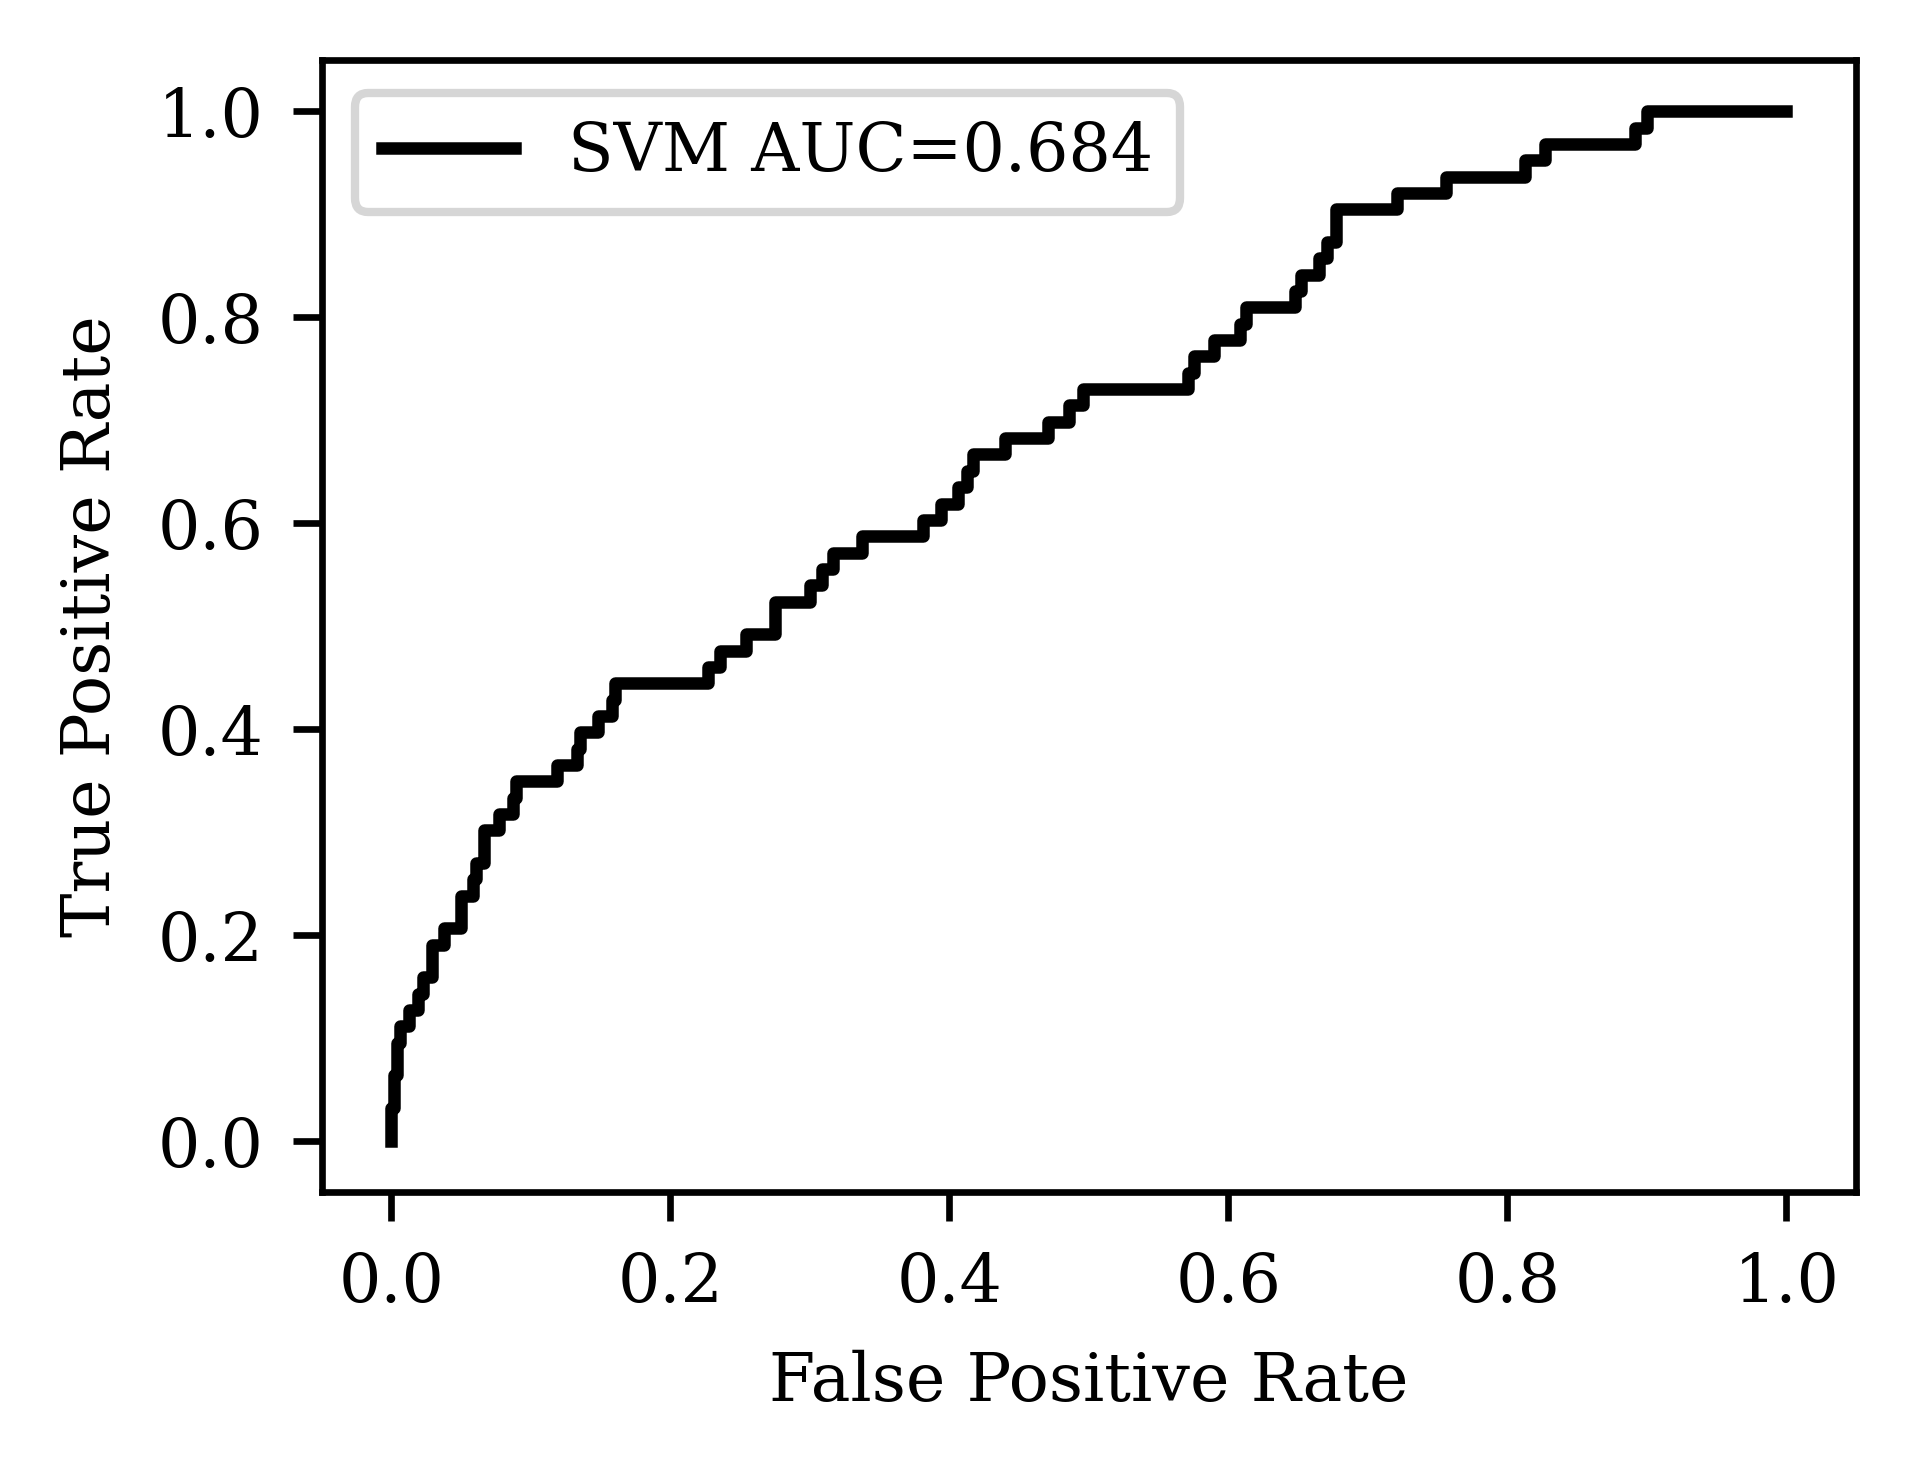

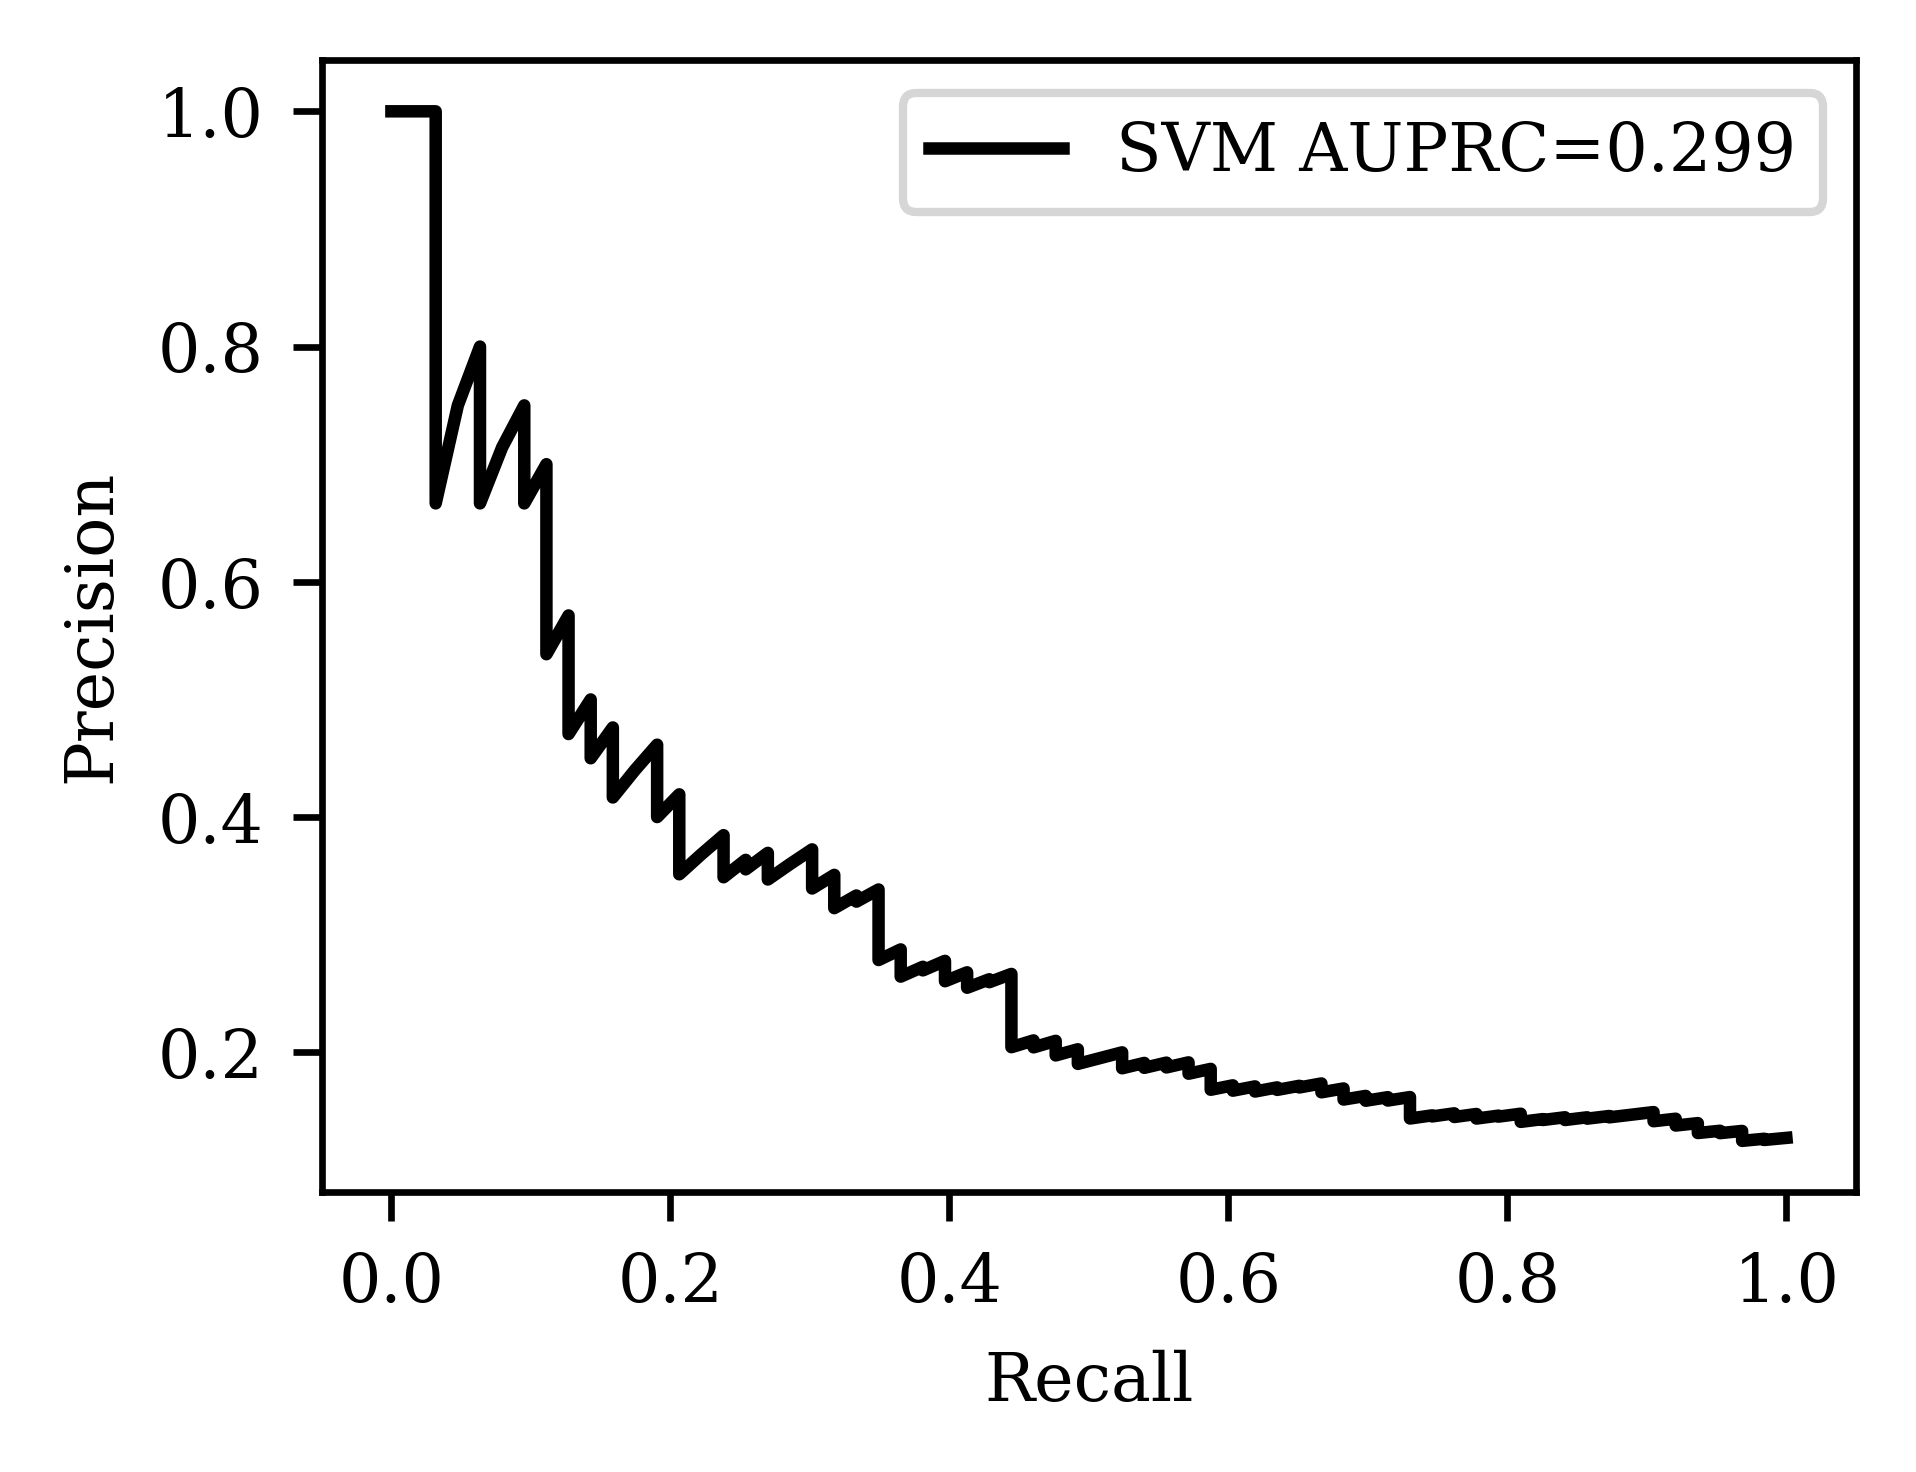

In [7]:
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_resample(x_train, y_train)

model = SVC(kernel='rbf', probability=True, random_state=0)
rand_list = {"C": stats.uniform(2, 10), "gamma": stats.uniform(0.1, 1)}
auc = make_scorer(roc_auc_score)
#rand_search = RandomizedSearchCV(model, param_distributions=rand_list, n_iter=10, n_jobs=5, cv=5, random_state=0, scoring=auc) 
#rand_search.fit(x_train, y_train) 
#best_params = rand_search.best_params_
best_params = {'C':6.17022004702574, 'gamma':0.8203244934421581}

model = SVC(kernel='rbf', probability=True, random_state=0, C=best_params['C'], gamma=best_params['gamma'])
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:,1]

classification_metrics("SVM", y_test, y_pred)
plot_roc(figname="output/SVM_roc.png", SVM="output/SVM_roc.csv")
plot_prc(figname="output/SVM_prc.png", SVM="output/SVM_prc.csv")